In [46]:
import numpy as np
import pandas as pd
import re
import math
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

In [2]:
webmd_scrape_df = pd.read_csv('webmd_scrape.csv')
#generate webmd dataframe

In [3]:
df1 = webmd_scrape_df[['conditionInfo',
                 'dateTime',
                 'easeOfUse',
                 'effectiveness',
                'helpful',
                'reviewerInfo',
                'satisfaction',
                'supplement']]
#select specific columns to be used

In [4]:
df1.shape
#check num of rows and columns

(7136, 8)

In [5]:
webmd_comment_df = pd.read_csv('comment_addition.csv')
#generate webmd comment dataframe

In [6]:
df2 = webmd_comment_df[['comment','dateTime']]
#selects the comment and datetime cols

In [7]:
merged_df = pd.merge(df1, df2, how='inner', left_on='dateTime', right_on='dateTime')
#merge the webmd and the comment csv files, on dateTime.
#dateTime was check and there was no duplicates, so it can be used as unique identifier

In [8]:
merged_df.sample(10)
#check sample of merged dataframe

,conditionInfo,dateTime,easeOfUse,effectiveness,helpful,reviewerInfo,satisfaction,supplement,comment
3703,Fibromyalgia,11/5/2012 5:34:05 PM,5,1,1,"skealy, 55-64 Female on Treatment for 1 to 6 ...",1,MELATONIN,It hasn't worked for me.
2601,Bone loss,3/20/2010 7:32:41 PM,2,1,0,"Sam, 65-74 Male on Treatment for less than 1 ...",1,VITAMIN D,This article says it discusses the side effect...
4784,General Health & Wellness,5/26/2010 4:15:32 PM,5,4,6,"Believer, 45-54 Male on Treatment for 1 to 6 ...",5,QUERCETIN,Increases energy without feeling jittery or ne...
4975,Diabetes,6/15/2014 2:53:55 PM,5,4,16,"hunybe9, 45-54 Female on Treatment for 1 to 6...",5,CHROMIUM,I started using this product to increase my me...
4240,Constipation,2/12/2017 4:18:39 PM,5,5,31,55-64 Female on Treatment for 5 to less than ...,5,MAGNESIUM,has helped me with constipation
5796,Other,2/9/2015 1:51:42 PM,5,5,2,55-64 Female on Treatment for 10 years or more,5,EMU OIL,100% Emu Oil used topically has helped relieve...
5962,Diabetes,6/14/2013 5:52:40 AM,3,4,28,"sp bhatnagar, 35-44 Male on Treatment for les...",3,FENUGREEK,finugreek is very effective in lowering blood ...
1570,Alcoholism,2/6/2017 4:06:59 AM,1,1,0,NaN,1,5-HTP,Which brand do people use? How can we be sure...
6591,Anxiety,12/20/2016 7:37:47 PM,3,3,2,"dia, 45-54 Female on Treatment for less than ...",3,ASHWAGANDHA,NaN
5677,General Health & Wellness,12/23/2012 7:25:09 AM,5,5,2,"Robbo, 55-64 Male on Treatment for 2 to less ...",5,ECHINACEA,At the advice of friends I started taking 5 ca...


In [9]:
merged_df.isnull().sum()
#check null values

conditionInfo      2
dateTime           0
easeOfUse          0
effectiveness      0
helpful            0
reviewerInfo     161
satisfaction       0
supplement         0
comment          782
dtype: int64

In [10]:
merged_df.fillna('',inplace=True)
#replace the NA with ''

In [11]:
merged_df.isnull().sum()
#check NA sum again

conditionInfo    0
dateTime         0
easeOfUse        0
effectiveness    0
helpful          0
reviewerInfo     0
satisfaction     0
supplement       0
comment          0
dtype: int64

In [33]:
def gender_determination(x):
    if re.findall('Female',x):
        return 'female'
    elif re.findall('Male', x):
        return 'male'
    else: 
        return 'none_provided'
#function to find gender of reviewer

In [34]:
merged_df['reviewer_gender'] = merged_df.reviewerInfo.apply(gender_determination)
#apply gender_determination function to reviewrInfo

In [35]:
merged_df

,conditionInfo,dateTime,easeOfUse,effectiveness,helpful,reviewerInfo,satisfaction,supplement,comment,reviewer_gender,reviewer_age
0,Other,11/29/2007 5:24:02 AM,5,4,74,"emma_Colorado, 35-44 Female on Treatment for ...",5,5-HTP,I take it for anxiety. 5-HTP stops the constan...,female,35-44
1,Other,9/25/2007 4:23:13 PM,5,4,74,"missindepend32, 25-34 Female on Treatment for...",5,5-HTP,I have bipolar disorder. I am less symptomatic...,female,25-34
2,Other,9/26/2008 8:27:11 PM,2,3,8,55-64 Male on Treatment for 1 to 6 months (Co...,2,IRON,severe upper stomach discomfort,male,55-64
3,Other,5/2/2008 5:33:37 AM,2,2,8,"katherine, 35-44 Female on Treatment for 10 y...",2,IRON,makes my stomic upset,female,35-44
4,Other,4/6/2008 4:05:23 PM,3,4,8,"robert mcfdonald, 75 or over Male on Treatmen...",3,IRON,,male,
5,Other,11/19/2010 10:57:10 PM,5,4,31,"marty, 65-74 Male",3,IODINE,no enery,male,65-74
6,Other,12/4/2009 11:38:07 AM,1,1,31,"Autumngurl, 45-54 Female on Treatment for 1 t...",1,IODINE,In reading your article I found that a doctor ...,female,45-54
7,Other,9/11/2009 2:27:21 AM,1,1,31,"liqui-kelp, 35-44 Female on Treatment for les...",1,IODINE,Ive been taking Iodin drops for two days. I di...,female,35-44
8,ADHD,10/10/2009 7:23:47 PM,5,4,70,"OCD and ADHD very helpful, 25-34 Female on Tr...",4,INOSITOL,My ADHD and OCD are particularly bad and work ...,female,25-34
9,Arthritis,10/16/2009 10:58:48 PM,5,5,124,"pbar, 45-54 Female on Treatment for 6 months ...",5,HYALURONIC ACID,I recommend Hyaluronic Acid to everyone who ha...,female,45-54


In [36]:
def age_determination(x):
    if re.findall('\d+-\d+',x):
        return re.findall('\d+-\d+',x)[0]
    else: 
        return 'none_provided'
#function to extract age bracket from reviewer info

In [37]:
merged_df['reviewer_age'] = merged_df.reviewerInfo.apply(age_determination)
#apply age_determination function to reviwer info

In [38]:
merged_df.sample(10)

,conditionInfo,dateTime,easeOfUse,effectiveness,helpful,reviewerInfo,satisfaction,supplement,comment,reviewer_gender,reviewer_age
4374,General Health & Wellness,3/19/2014 5:46:19 AM,5,1,80,"john chai, 65-74 Male on Treatment for less t...",1,MORINGA,,male,65-74
949,Other,7/25/2013 3:20:45 PM,5,5,10,"Pat, 75 or over Female on Treatment for 6 mon...",5,HYALURONIC ACID,"I am an 83-year-old female, with advanced wet ...",female,none_provided
5156,High blood pressure,10/30/2016 5:59:57 PM,1,1,1,"Anne, 55-64 on Treatment for less than 1 month...",1,COD LIVER OIL,This is not the cod liver oil that my mother g...,none_provided,55-64
3629,Insomnia,8/4/2011 11:04:55 AM,5,5,24,65-74 Female on Treatment for 1 to 6 months (...,5,MELATONIN,Had trouble winding down at bedtime & staying ...,female,65-74
3271,High cholesterol,5/31/2019 4:04:06 PM,5,5,2,"Kara, 65-74 on Treatment for 2 to less than 5 ...",5,LECITHIN,"I use sunflower version, as the soy version do...",none_provided,65-74
120,Diabetes,11/26/2009 9:36:55 PM,5,5,1,"myers18111, 45-54 Male on Treatment for 2 to ...",5,FISH OIL,My doctor requested that I continue taking it.,male,45-54
237,Arthritis,7/25/2013 11:46:09 AM,5,1,0,"sunshine, 35-44 Female on Treatment for less ...",1,FISH OIL,I reacted severely to Omega 3 supplement with ...,female,35-44
5248,General Health & Wellness,2/18/2013 10:06:28 AM,5,5,190,65-74 Male on Treatment for 2 to less than 5 ...,5,COLLOIDAL SILVER,I have been using colloidal silver for about 2...,male,65-74
542,General Health & Wellness,3/21/2014 12:57:50 PM,5,5,15,"Nevada, 55-64 Female on Treatment for 1 to 6 ...",5,GINGER,Have swollen knee after playing sports. Decide...,female,55-64
1093,Depression,4/18/2011 12:23:43 AM,5,5,105,19-24 Male on Treatment for 2 to less than 5 ...,5,INOSITOL,Highly recommend to anyone suffering from Obse...,male,19-24


In [39]:
age_gender = merged_df[['reviewer_age','reviewer_gender']]
# #make new dataframe with only age and gender
age_gender = age_gender[~age_gender.reviewer_age.str.contains('none_provided')]
# #remove blank age
age_gender = age_gender[~age_gender.reviewer_gender.str.contains('none_provided')]
# #remove blank gender

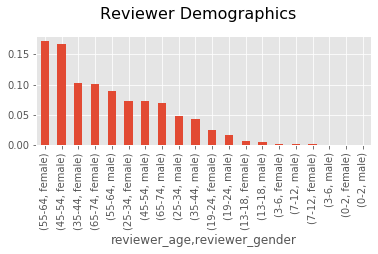

In [117]:
dfasdfs = age_gender.groupby('reviewer_age')['reviewer_gender'].value_counts().sort_values(ascending=False)/5625
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.5)
dfasdfs.sort_values(ascending=False).plot.bar()
plt.suptitle('Reviewer Demographics', fontsize=16)
plt.savefig("reviewer_demographics.png",dpi=300,bbox_inches='tight')
#set dpi to 600 to improve resolution
plt.show()

#here we are showing the reviewers demographics, which tells us the users of the website, which is also the targeted audience

In [72]:
age_gender.shape

(5625, 2)

In [245]:
condition_ranks = merged_df.conditionInfo.value_counts()
condition_ranks

Other                                                  1404
General Health & Wellness                              1298
Insomnia                                                297
Arthritis                                               241
Anxiety                                                 236
Weight loss                                             223
Depression                                              195
Diabetes                                                154
High blood pressure                                      90
Fibromyalgia                                             80
Sleep                                                    80
Erectile dysfunction (ED)                                78
Hair loss                                                75
Pain                                                     61
Fatigue                                                  60
Stress                                                   60
Brittle nails                           

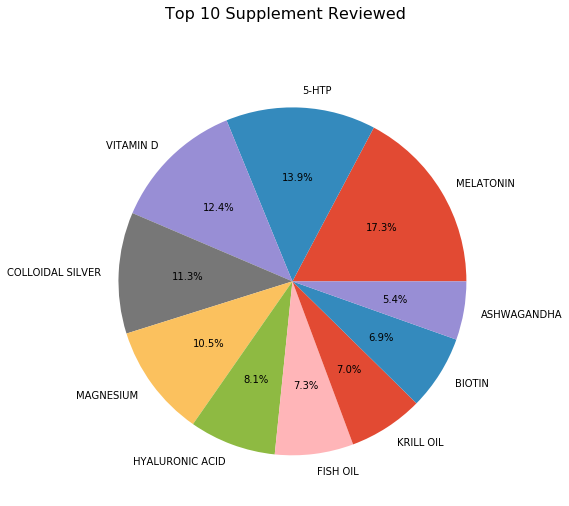

In [116]:
merged_df.supplement.value_counts().head(10).plot.pie(figsize=(8,8),autopct='%0.01f%%')
plt.ylabel('')
plt.suptitle('Top 10 Supplement Reviewed', fontsize=16)
plt.savefig("Top 10 Supplement Reviewed.png",dpi=300,bbox_inches='tight')

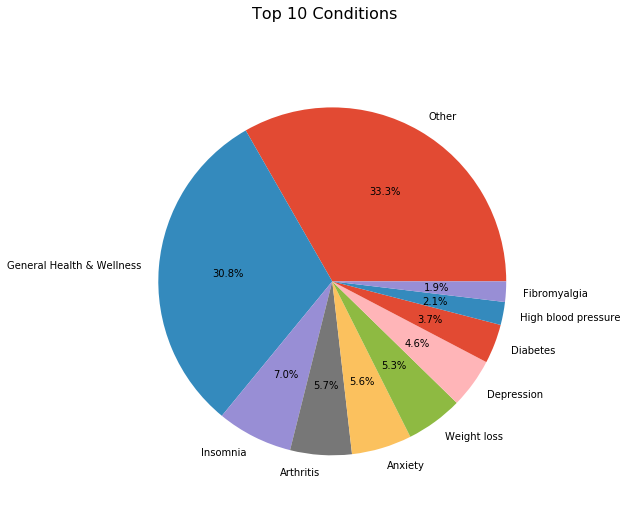

In [249]:
condition_ranks.head(10).plot.pie(figsize=(8,8),autopct='%0.01f%%')
plt.ylabel('')
plt.suptitle('Top 10 Conditions', fontsize=16)
plt.savefig("Top 10 Condition.png",dpi=300,bbox_inches='tight')

In [98]:
mean_of_stars = merged_df.groupby('supplement').mean()
mean_of_stars.sample(10)

,easeOfUse,effectiveness,helpful,satisfaction
supplement,,,,
DAMIANA,4.447368,3.947368,16.052632,3.973684
BROMELAIN,4.565217,4.413043,28.500000,4.391304
GABA GAMMA-AMINOBUTYRIC ACID,4.662500,4.312500,32.812500,4.362500
YOHIMBE,3.446970,3.106061,8.681818,2.439394
ASTAXANTHIN,4.602273,4.000000,44.329545,4.000000
CHOLINE,4.250000,4.062500,45.000000,3.812500
GLUCOMANNAN,4.066667,3.750000,33.850000,3.833333
FENUGREEK,4.424658,4.150685,13.123288,4.013699
WHEY PROTEIN,3.772727,3.500000,6.204545,3.522727


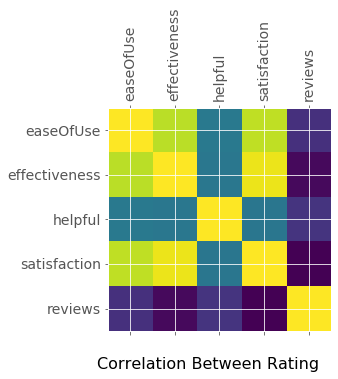

In [141]:
f2 = plt.matshow(mean_of_stars.corr())
plt.xticks(range(mean_of_stars.shape[1]), mean_of_stars.columns, fontsize=14, rotation=90)
plt.yticks(range(mean_of_stars.shape[1]), mean_of_stars.columns, fontsize=14)
plt.suptitle('Correlation Between Rating', fontsize=16,x=0.5, y=0.0)
plt.savefig("Correlation Between Rating.png",dpi=300, bbox_inches='tight')
plt.show()

In [142]:
merged_df[(merged_df.reviews>merged_df.reviews.mean()) & (merged_df.helpful>merged_df.helpful.mean())].sort_values('effectiveness', ascending=False)
#here we are slicing the most effective with the conditions of reviews greaters than mean review and helpful greater than mean helpful


AttributeError: 'DataFrame' object has no attribute 'reviews'

In [125]:
mean_of_stars.sample(5)

,easeOfUse,effectiveness,helpful,satisfaction
supplement,,,,
EVENING PRIMROSE OIL,4.651376,4.238532,20.495413,4.330275
PHOSPHATIDYLSERINE,4.333333,3.857143,35.595238,3.904762
CONJUGATED LINOLEIC ACID,4.075949,3.455696,50.721519,3.556962
PROGESTERONE,3.873239,3.295775,4.647887,3.042254
CREATINE,4.205128,3.897436,14.564103,3.743590


In [130]:
mean_of_stars['reviews'] = merged_df.supplement.value_counts()

In [140]:
top10_effective = mean_of_stars[(mean_of_stars.reviews>mean_of_stars.reviews.mean()) & (mean_of_stars.helpful>mean_of_stars.helpful.mean())].sort_values('effectiveness', ascending=False)
top10_effective

from IPython.display import display
display(top10_effective)



,easeOfUse,effectiveness,helpful,satisfaction,reviews
supplement,,,,,
COLLOIDAL SILVER,4.841424,4.689320,27.317152,4.699029,309
RHODIOLA,4.581633,4.163265,31.438776,4.030612,98
MORINGA,4.277027,4.108108,35.729730,4.135135,148
MAGNESIUM,4.386760,4.059233,23.435540,4.069686,287
L-ARGININE,4.523438,4.054688,33.609375,4.109375,128
ASHWAGANDHA,4.402685,3.966443,33.248322,3.899329,149
SERRAPEPTASE,4.368932,3.951456,56.281553,3.912621,103
COCONUT OIL,4.375000,3.937500,26.156250,4.052083,96
5-HTP,4.405759,3.910995,37.835079,3.832461,382


In [143]:
import nltk

In [152]:
supplement_reviews = merged_df[['supplement','comment']]
supplement_reviews
#slice to only supplement and reviews for NLP

,supplement,comment
0,5-HTP,I take it for anxiety. 5-HTP stops the constan...
1,5-HTP,I have bipolar disorder. I am less symptomatic...
2,IRON,severe upper stomach discomfort
3,IRON,makes my stomic upset
4,IRON,
5,IODINE,no enery
6,IODINE,In reading your article I found that a doctor ...
7,IODINE,Ive been taking Iodin drops for two days. I di...
8,INOSITOL,My ADHD and OCD are particularly bad and work ...
9,HYALURONIC ACID,I recommend Hyaluronic Acid to everyone who ha...


In [214]:
melatonin_reviews = supplement_reviews[supplement_reviews['supplement']=='MELATONIN']

In [215]:
melatonin_reviews.supplement = melatonin_reviews.supplement.str.lower()

/Users/xc_pro/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [216]:
melatonin_reviews['comment'] = melatonin_reviews['comment'].str.lower()
melatonin_reviews['comment']

/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3208    i have ms and am on predasone often. my doctor...
3209                                                     
3210    my 6 yr. old son has adhd & is taking concerta...
3513    my 9 year old son has adhd and takes concerta,...
3514    i have major insomnia and am very skeptical ab...
3515                                                     
3516    perhaps due to the many other otc drugs i have...
3517    i have tried a number of other sleep aids, inc...
3518                                                     
3519    melatonin helps me fall sleep and stay sleep; ...
3520    i'm using melatonin for sleep.. i work late ni...
3521    after using melatonin, i experienced severe co...
3522          restless sleep no more, all night sleep now
3523    tried many meds both rx and otc.   this one is...
3524    i have trouble sleeping at night and melatonin...
3525    i work a rotating shift and melatnin seems to ...
3526    i have tried tylenol pm and other over the cou...
3527    this i

In [217]:
tbr = ['melatonin']
melatonin_reviews['comment'] = melatonin_reviews['comment'].apply(lambda x: '' if x in tbr else x)
melatonin_reviews

/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,supplement,comment
3208,melatonin,i have ms and am on predasone often. my doctor...
3209,melatonin,
3210,melatonin,my 6 yr. old son has adhd & is taking concerta...
3513,melatonin,"my 9 year old son has adhd and takes concerta,..."
3514,melatonin,i have major insomnia and am very skeptical ab...
3515,melatonin,
3516,melatonin,perhaps due to the many other otc drugs i have...
3517,melatonin,"i have tried a number of other sleep aids, inc..."
3518,melatonin,
3519,melatonin,melatonin helps me fall sleep and stay sleep; ...


In [222]:
melatonin_reviews['comment'] = melatonin_reviews['comment'].apply(lambda x: re.sub('melatonin','',x))
#removes melatonin text from review

melatonin_reviews['comment'] = melatonin_reviews['comment'].apply(lambda x: re.sub('\s+',' ',x))

melatonin_reviews['comment'] = melatonin_reviews['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))

from nltk.corpus import stopwords
stop = stopwords.words('english')

melatonin_reviews['comment'] = melatonin_reviews['comment'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))


melatonin_reviews['comment'].sample(10)

/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

3847        took one 3 mg tablet 5 mg zolpidim slept well
3576    severe insomnia along w depression anxiety don...
3531    son autisum adhd drug 2 n half yrs find works ...
3803        helps go sleep need help seem affect next day
3684    would thought would help anxiety work lot prob...
3727    10mg works effectively longer insomnia side ef...
3868                               ihave loose dark stool
3515                                                     
3611                                                     
3870                                                     
Name: comment, dtype: object

In [223]:
from wordcloud import WordCloud

In [224]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)


In [226]:
wc.generate(' '.join(melatonin_reviews['comment']))


In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

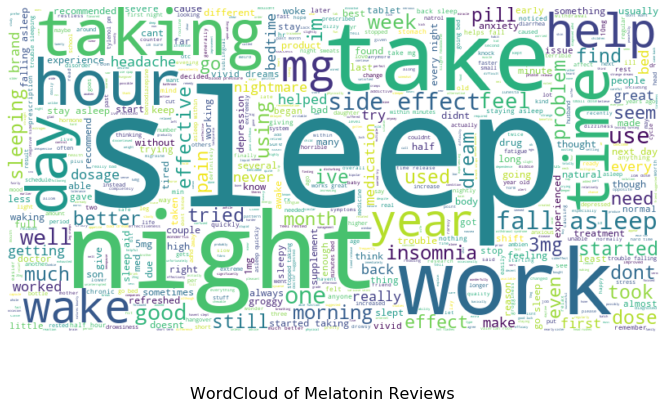

In [228]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.suptitle('WordCloud of Melatonin Reviews', fontsize=16,x=0.5, y=0.0)
plt.savefig("WordCloud of Melatonin Reviews.png",dpi=300, bbox_inches='tight')

plt.show()

In [233]:
silver_reviews = supplement_reviews[supplement_reviews['supplement']=='COLLOIDAL SILVER']



In [234]:
silver_reviews.sample(5)


,supplement,comment
4848,COLLOIDAL SILVER,I took very high dose for about 28 days to tre...
4849,COLLOIDAL SILVER,web md is afraid to show any positive results ...
4850,COLLOIDAL SILVER,it has helped everything in my family that doc...
4851,COLLOIDAL SILVER,staph infection in the bursa of my elbow and d...
5166,COLLOIDAL SILVER,My 3 yo daughter had a fever (101 degrees) and...
5167,COLLOIDAL SILVER,Colloidal silver literally saved my life. I ha...
5168,COLLOIDAL SILVER,I have used Colloidal Silver for a multitude o...
5169,COLLOIDAL SILVER,"have a fungus on my bid toes,spraying both for..."
5170,COLLOIDAL SILVER,I've used colloidal silver in the ears to get ...
5171,COLLOIDAL SILVER,I haves used it for food poisoning and eye inf...


In [242]:


silver_reviews['comment'] = silver_reviews['comment'].str.lower()

silver_reviews['comment'] = silver_reviews['comment'].apply(lambda x: re.sub('colloidal silver','',x))
silver_reviews['comment'] = silver_reviews['comment'].apply(lambda x: re.sub('colloidal','',x))
#removes silver text from review
silver_reviews['comment'] = silver_reviews['comment'].apply(lambda x: re.sub('\s+',' ',x))

silver_reviews['comment'] = silver_reviews['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))

from nltk.corpus import stopwords
stop = stopwords.words('english')

silver_reviews['comment'] = silver_reviews['comment'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))


silver_reviews['comment'].sample(10)

/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xc_pro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

5336    miracle treatment dont misled hundreds positiv...
5186    years problem diverticulosis since taking bout...
5209    began using 8 years ago one tablespoon daily k...
5455                                                     
5329    since discovering 2 years ago come cold bronch...
5167    literally saved life lung disease developed th...
5351    thoroughly researched product like products in...
5290    amazing never would believed friendwhos nursei...
5415                              general use health good
5398    diagnosed shingles put salve rash 34 times day...
Name: comment, dtype: object

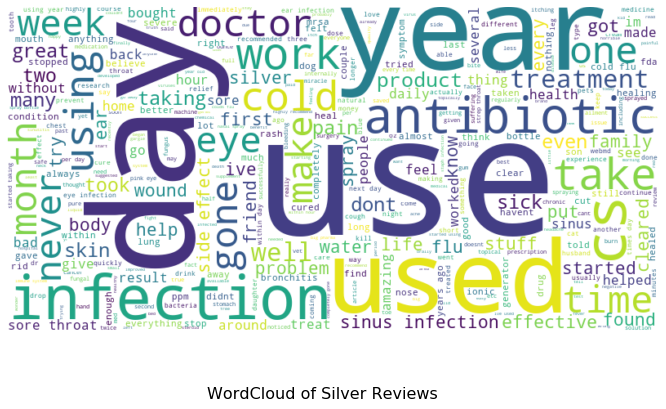

In [243]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
wc.generate(' '.join(silver_reviews['comment']))
%matplotlib inline


plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.suptitle('WordCloud of Silver Reviews', fontsize=16,x=0.5, y=0.0)
plt.savefig("WordCloud of Silver Reviews.png",dpi=300, bbox_inches='tight')

plt.show()